In [ ]:
!pip install -q lucid>=0.2.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
xarray-einstats 0.5.1 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
tensorflow 2.11.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
opencv-python 4.7.0.72 requires numpy>=1.19.3; python_version >= "3.9", but you have numpy 1.19.0 which is incompatible.
opencv-python-headless 4.7.0.72 requires numpy>=1.19.3; python_version >= "3.9", but you have numpy 1.19.0 which is incompatible.
opencv-contrib-python 4.7.0.72 requires numpy>=1.19.3; python_version >= "3.9", but you have numpy 1.19.0 which is incompatible.
matplotlib 3.7.1 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
librosa 0.10.0.post1 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have nu

In [ ]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 525.85.12'
b'NVIDIA Corporation'


In [ ]:
import math
# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

gl.glColor3f(.5,.3,.7)
gl.glPointSize(5)

# AXIS
gl.glBegin(gl.GL_LINES)
gl.glVertex2f(0,-1)
gl.glVertex2f(0,1)
gl.glVertex2f(1,0)
gl.glVertex2f(-1,0)
gl.glEnd()

gl.glColor3f(0,.5,0)
gl.glBegin(gl.GL_POINTS)
gl.glVertex2f(.1, 0)
gl.glEnd()

# Green 
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(.2,.2)
gl.glVertex2f(-.2,.2)
gl.glVertex2f(-.2,-.2)
gl.glVertex2f(.2,-.2)
gl.glEnd()

# Roatating degree
a = math.cos(math.radians(45))
b = math.sin(math.radians(45))

# print(a)

# Rotating matrix
r = np.array([[a, -b, 0],
             [b, a, 0],
             [0, 0, 1]])


sc = 0.5              # scaling value.
s = np.array([[sc, 0, 0],
             [0, sc, 0],
             [0, 0, 1]])

# Multiplying the rotational and scaling matrix.
rs = np.matmul(r,s)

# Creating matrixes
v1 = np.array([[.2],
              [.2],
              [1]])
v2 = np.array([[-.2],
              [.2],
              [1]])
v3 = np.array([[-.2],
              [-.2],
              [1]])
v4 = np.array([[.2],
              [-.2],
              [1]])

#rotation
# v11 = np.matmul(r,v1)
# v22 = np.matmul(r,v2)
# v33 = np.matmul(r,v3)
# v44 = np.matmul(r,v4)

#scaling
# v11 = np.matmul(s,v1)
# v22 = np.matmul(s,v2)
# v33 = np.matmul(s,v3)
# v44 = np.matmul(s,v4)

#rotation - scaling
v11 = np.matmul(rs,v1)
v22 = np.matmul(rs,v2)
v33 = np.matmul(rs,v3)
v44 = np.matmul(rs,v4)

gl.glColor3f(1,0,0)
gl.glBegin(gl.GL_QUADS)
gl.glVertex2f(v11[0][0],v11[1][0])      # x, y values of the respective vectors passed into the function glVertex2f.

gl.glVertex2f(v22[0][0],v22[1][0])      # [1][0] This represents the column and row number of the specific vector element that
gl.glVertex2f(v33[0][0],v33[1][0])      # we want to pass.

gl.glVertex2f(v44[0][0],v44[1][0])      # In this function, we are basically passing x then y.
gl.glEnd()

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
#show.image(img/255.0)


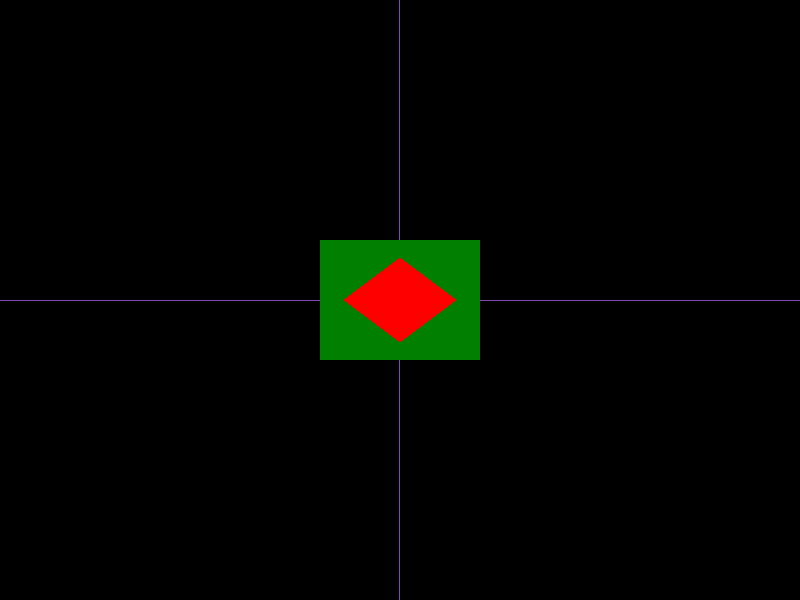

In [ ]:
from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))